In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score , silhouette_score, davies_bouldin_score
from clustering_metrics import calculate_davies_bouldin_index, calculate_dunn_index, calculate_silhouette_score
from clustering_utils import euclidean_distance, manhattan_distance
from sklearn.cluster import DBSCAN
from typing import List, Tuple, Union, Dict


In [2]:
class My_DBSCAN:
    def __init__(self, eps=0.5, min_samples=10, metric='euclidean'):
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
    
    def check_point_core(self, point_idx: int) -> Tuple[bool, np.ndarray]:
        curr_neighbors = np.argwhere(self.distances[point_idx] <= self.eps).flatten()
        return len(curr_neighbors) >= self.min_samples, curr_neighbors
    
    def fit(self, X):
        # Calculate the distance between each pair of points
        self.distances = np.zeros((len(X), len(X)))
        distance_metric = None
        if self.metric == 'euclidean':
            distance_metric = euclidean_distance
        elif self.metric == 'manhattan':
            distance_metric = manhattan_distance
        
        for i in range(len(X)):
            for j in range(i+1, len(X)):
                self.distances[i][j] = distance_metric(X[i], X[j])
                self.distances[j][i] = self.distances[i][j]
        
        neighbors = [np.argwhere(self.distances[i] <= self.eps).flatten() for i in range(len(X))]

        # assigned_clusters_dfs = self.assign_clusters_using_dfs(X, neighbors)
        assigned_clusters_bfs = self.assign_clusters_using_bfs(X, neighbors)
        # print(np.array_equal(assigned_clusters_dfs, assigned_clusters_bfs))

        self.labels_ = assigned_clusters_bfs
        return self.labels_
    
    def assign_clusters_using_dfs(self, X: np.ndarray, neighbors: List[np.ndarray]) -> np.ndarray:
        assigned_clusters = np.full(len(X), -1)
        curr_cluster_idx = 0
        for i in range(len(X)):
            if assigned_clusters[i] == -1:
                self.dfs(i, curr_cluster_idx, assigned_clusters, neighbors)
                curr_cluster_idx += 1
        return assigned_clusters
    
    def dfs(self, curr_point: int, curr_cluster_idx: int, assigned_clusters: np.ndarray, neighbors: List[np.ndarray]):
        assigned_clusters[curr_point] = curr_cluster_idx
        curr_neighbors = neighbors[curr_point]
        for n in curr_neighbors:
            if assigned_clusters[n] == -1:
                self.dfs(n, curr_cluster_idx, assigned_clusters, neighbors)

    def assign_clusters_using_bfs(self, X: np.ndarray, neighbors: List[np.ndarray]) -> np.ndarray:
        assigned_clusters = np.full(len(X), -1)
        curr_cluster_idx = 0
        for i in range(len(X)):
            if assigned_clusters[i] == -1:
                self.bfs(i, curr_cluster_idx, assigned_clusters, neighbors)
                curr_cluster_idx += 1
        return assigned_clusters
    
    def bfs(self, start_point: int, curr_cluster_idx: int, assigned_clusters: np.ndarray, neighbors: List[np.ndarray]):
        assigned_clusters[start_point] = curr_cluster_idx
        queue = [start_point]
        while len(queue) > 0:
            curr_point = queue.pop(0)
            curr_neighbors = neighbors[curr_point]
            for n in curr_neighbors:
                if assigned_clusters[n] == -1:
                    assigned_clusters[n] = curr_cluster_idx
                    queue.append(n)

                

In [3]:
def plot_results(X: np.ndarray, labels: np.ndarray, title: str="") -> None:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

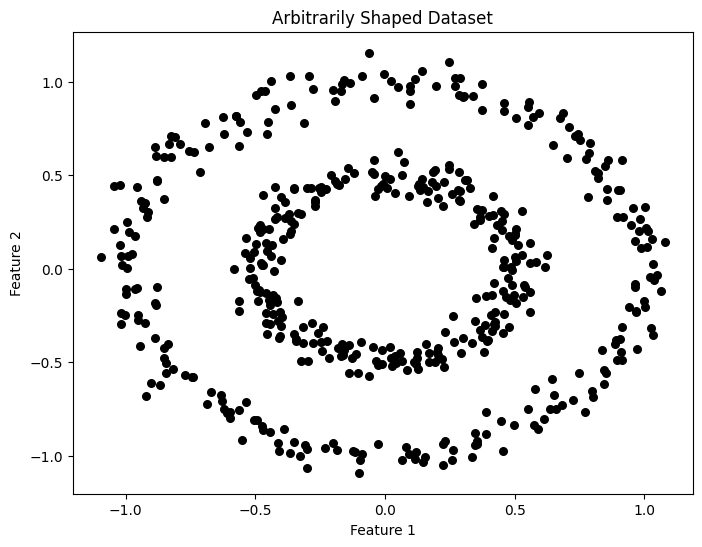

In [4]:
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], s=30, c='black')
plt.title("Arbitrarily Shaped Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


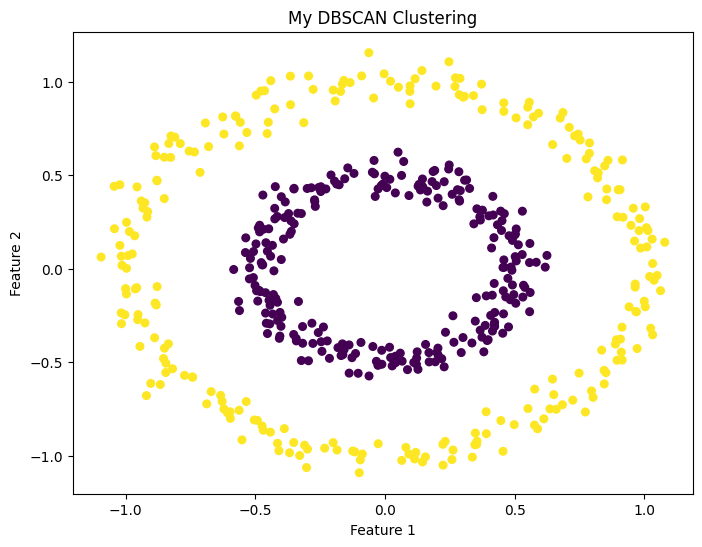

In [5]:
DBSCAN_model = My_DBSCAN(eps=0.2, min_samples=5)
labels = DBSCAN_model.fit(X_circles)
plot_results(X_circles, labels, title="My DBSCAN Clustering")

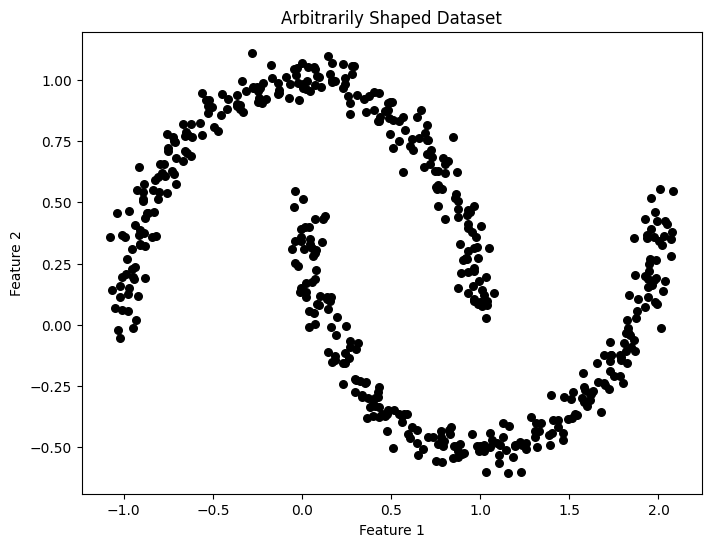

In [6]:
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], s=30, c='black')
plt.title("Arbitrarily Shaped Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


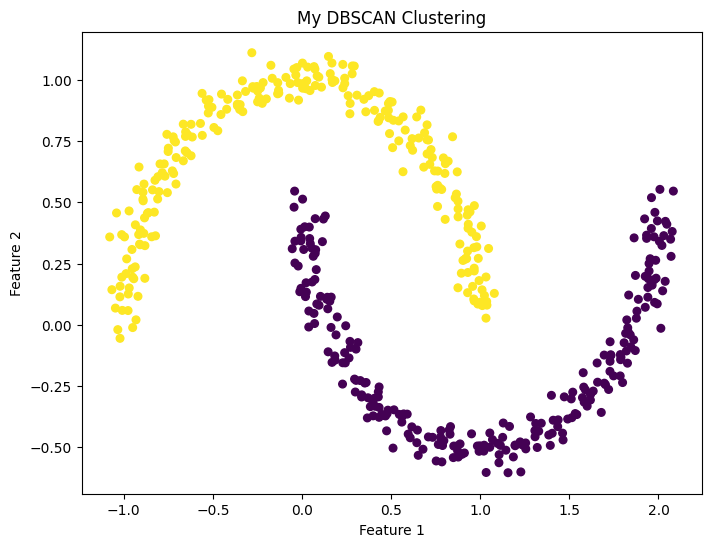

In [7]:
DBSCAN_model = My_DBSCAN(eps=0.2, min_samples=5)
labels = DBSCAN_model.fit(X_moons)
plot_results(X_moons, labels, title="My DBSCAN Clustering")

# Sklearn

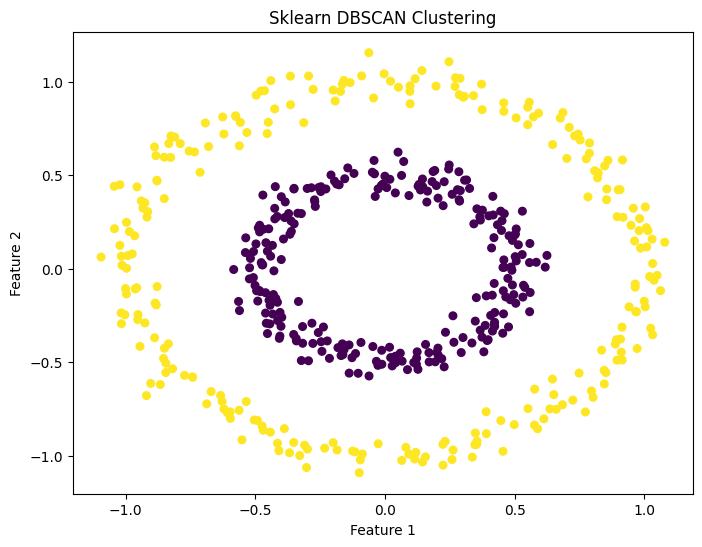

In [8]:
sklearn_dbscan = DBSCAN(eps=0.2, min_samples=5)
sklearn_labels = sklearn_dbscan.fit_predict(X_moons)
plot_results(X_circles, sklearn_labels, title="Sklearn DBSCAN Clustering")

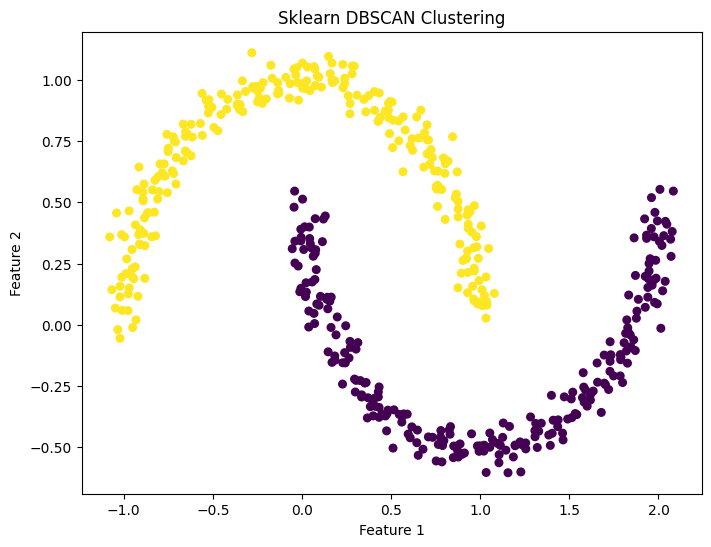

In [9]:
sklearn_dbscan = DBSCAN(eps=0.2, min_samples=5)
sklearn_labels = sklearn_dbscan.fit_predict(X_moons)
plot_results(X_moons, sklearn_labels, title="Sklearn DBSCAN Clustering")